# NOTEBOOK 04b: K-NEAREST NEIGHBORS

In [1]:
import time
import pandas as pd
import numpy as np

from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

np.random.seed(42)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
!ls '../assets'

1544988010_comments_df.csv     1545277666_y_train.csv
1545241316_clean_target.csv    1545336727_SVD_col.csv
1545241316_clean_text.csv      1545336727_XtestSVD_coo.npz
1545266972_clean_text.csv      1545336727_XtrainSVD_coo.npz
1545266972_cvec_coo.npz        cvec_1545266972_coo_col.csv
1545272821_eda_words.csv       file_log.txt
1545277666_tfidf_col.csv       test_1545277666_tfidf_coo.npz
1545277666_y_test.csv          train_1545277666_tfidf_coo.npz


In [3]:
columns = pd.read_csv('../assets/1545336727_SVD_col.csv', na_filter=False, header=None)
cols = np.array(columns[0])

In [4]:
XtrainSVD_coo = sparse.load_npz('../assets/1545336727_XtrainSVD_coo.npz')
X_train_svd = pd.SparseDataFrame(XtrainSVD_coo, columns=cols)

In [5]:
XtestSVD_coo = sparse.load_npz('../assets/1545336727_XtestSVD_coo.npz')
X_test_svd = pd.SparseDataFrame(XtestSVD_coo, columns=cols)

In [6]:
X_train_svd.fillna(0, inplace=True)
X_test_svd.fillna(0, inplace=True)

In [7]:
y_train = pd.read_csv('../assets/1545277666_y_train.csv', header=None)
y_test = pd.read_csv('../assets/1545277666_y_test.csv', header=None)

In [8]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [9]:
params = {
    'n_neighbors': [3,21,39,51]
}

gs = GridSearchCV(KNeighborsClassifier(), 
                  param_grid=params, 
                  return_train_score=True,
                  cv=3,
                  verbose=2,
                 )

In [10]:
gs.fit(X_train_svd, y_train)
gs.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_neighbors=3, total=190.0min
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 569.5min remaining:    0.0s


[CV] ................................... n_neighbors=3, total=180.5min
[CV] n_neighbors=3 ...................................................
[CV] ................................... n_neighbors=3, total=177.6min
[CV] n_neighbors=21 ..................................................
[CV] .................................. n_neighbors=21, total=204.0min
[CV] n_neighbors=21 ..................................................
[CV] .................................. n_neighbors=21, total=195.9min
[CV] n_neighbors=21 ..................................................
[CV] .................................. n_neighbors=21, total=195.6min
[CV] n_neighbors=39 ..................................................
[CV] .................................. n_neighbors=39, total=195.6min
[CV] n_neighbors=39 ..................................................
[CV] .................................. n_neighbors=39, total=192.2min
[CV] n_neighbors=39 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 6956.0min finished


{'n_neighbors': 21}

In [11]:
gs.best_params_

{'n_neighbors': 21}

In [12]:
gs.score(X_train_svd, y_train)

0.6763493321505697

In [ ]:
gs.score(X_test_svd, y_test)

In [46]:
gs.cv_results_

{'mean_fit_time': array([0.00762382, 0.00582571, 0.00423021, 0.00588241, 0.0048142 ,
        0.0063787 , 0.00616207, 0.00358181, 0.00579386]),
 'std_fit_time': array([0.00185505, 0.00301614, 0.00095007, 0.00165308, 0.00102656,
        0.00315467, 0.00143439, 0.00064321, 0.00177152]),
 'mean_score_time': array([0.03787479, 0.03771234, 0.03239565, 0.0434402 , 0.04286418,
        0.04395003, 0.04068179, 0.03317399, 0.04016538]),
 'std_score_time': array([0.00372267, 0.00660769, 0.0030092 , 0.01243258, 0.01739264,
        0.01595347, 0.0146071 , 0.00707124, 0.01146533]),
 'param_n_neighbors': masked_array(data=[3, 9, 15, 21, 27, 33, 39, 45, 51],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 9},
  {'n_neighbors': 15},
  {'n_neighbors': 21},
  {'n_neighbors': 27},
  {'n_neighbors': 33},
  {'n_neighbors': 39},
  {'n_neighbors': 45},
  

Because we're only gridsearching a single hyperparameter, we can easily plot out the accuracy we achieve at each of our values to identify our optimal value (or ascertain where we might search more granularly for a global minimum).

In [47]:
neighbors = []
scores = []
for i, model in enumerate(gs.cv_results_['params']):
    neighbors.append(model['n_neighbors'])
    scores.append(gs.cv_results_['mean_test_score'][i])

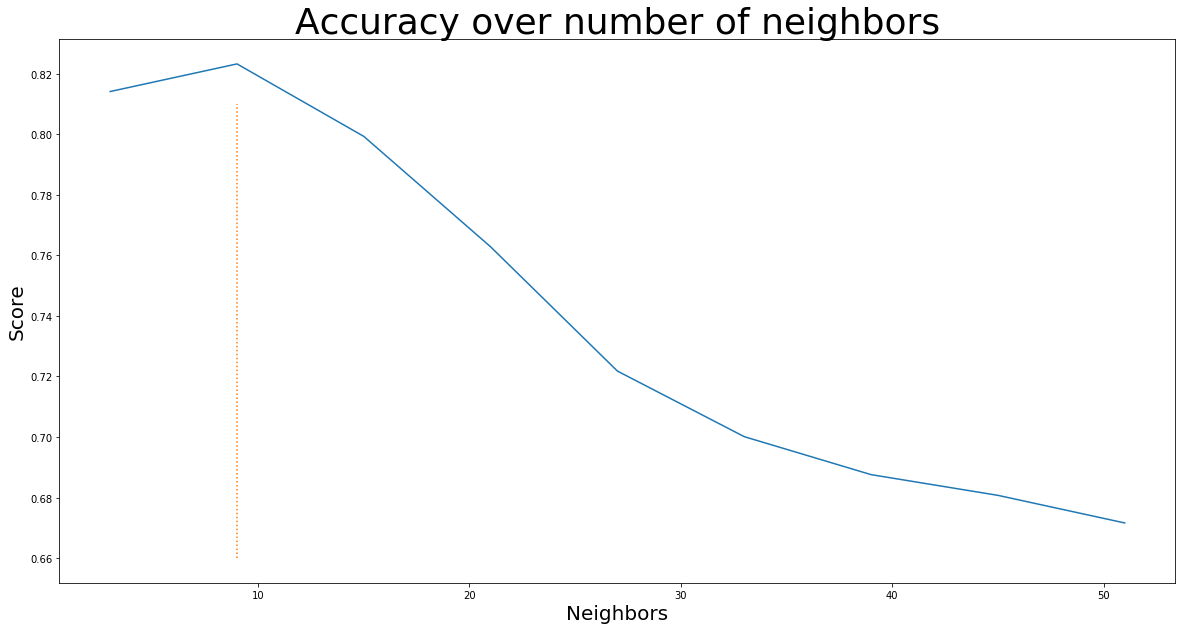

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(neighbors, scores)
plt.xlabel('Neighbors', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.title('Accuracy over number of neighbors', fontsize=36)
plt.plot([gs.best_params_['n_neighbors']]*2, [.66, .81], ':')